<a href="https://colab.research.google.com/github/gabey14/Deep-Learning-Notebooks/blob/master/Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gabey14/Deep-Learning-Notebooks/master/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
12,1000,2,38.0
4,1200,2,51.0
15,1175,2,42.0
3,1521,3,75.0
2,1440,3,62.0


In [3]:
# Scale the dataset

from sklearn import preprocessing as sk

sx = sk.MinMaxScaler()
sy = sk.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [56]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [57]:
# convert price to 1D as during scaling it became 2D
# scaled_y.reshape(scaled_y.shape[0],)
scaled_y.flatten()

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

#### Gradient descent allows to find weights (w1,w2) and bias in following linear equation for housing price prediction

###**`price = w1 * area + w2 * bedrooms + bias`**

#### Implement batch gradient descent.

In [8]:
# Implement mini batch gradient descent in python and plot cost vs epoch graph. 
# Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, 
# In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, 
# you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. 
# In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [64]:
# generate a batch of random numbers
# import random 
np.random.permutation(20)

0
5
10
15


In [122]:
from numpy.random.mtrand import random
def mini_batch_gradient_descent(X,y_true, epochs = 100, batch_size = 5,learning_rate = 0.01):

    # 2 features area and bedrooms
    number_of_features = X.shape[1]

    # assigning weights
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    # in this case mini batch becomes same as batch  
    if batch_size > total_samples:
      batch_size = total_samples

    # arrays to store cost and epochs
    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        # print(random_indices)
        X_tmp = X[random_indices]
        # print(X_tmp)
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            # print(Xj)
            y_predicted = np.dot(w, Xj.T) + b
            
            # Gradients
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            # Adjusting weights
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            # cost using MSE                
            cost = np.mean(np.square(yj-y_predicted)) 
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [123]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71015888, 0.67817164]), -0.2335045139416325, 0.004542629557380831)

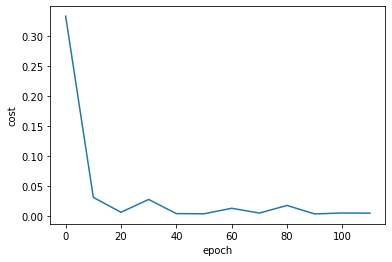

In [124]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [125]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

In [126]:
predict(2600,4,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.64818518504728

In [127]:
predict(1000,2,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


29.97700740764586